# Support Vector Machines Project 
 We will be analyzing the famous iris data set!

## The Data
We will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Here's a picture of the three different Iris types:

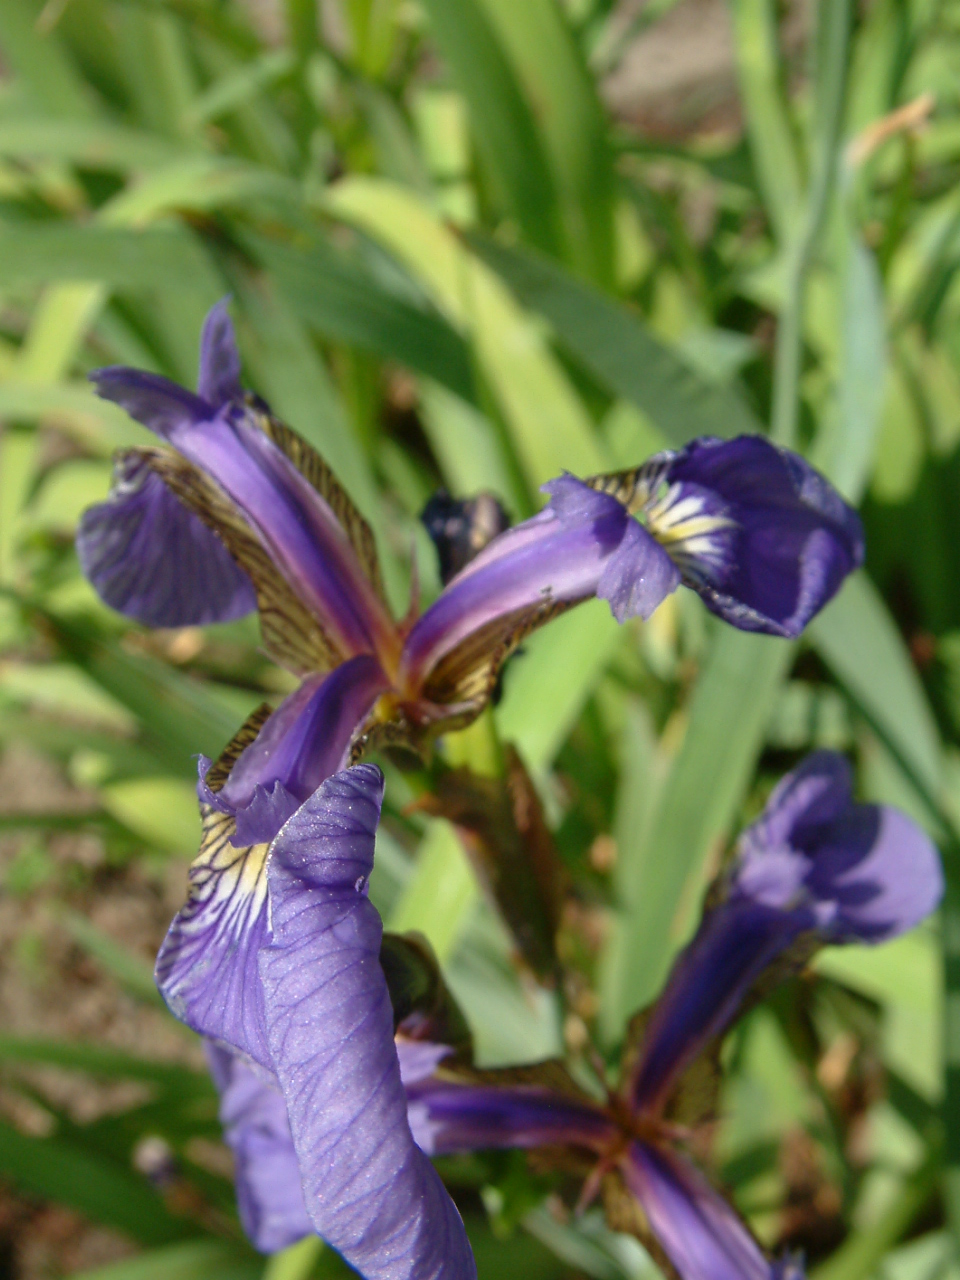

In [1]:
# The Iris Setosa
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'
Image(url,width=300, height=300)

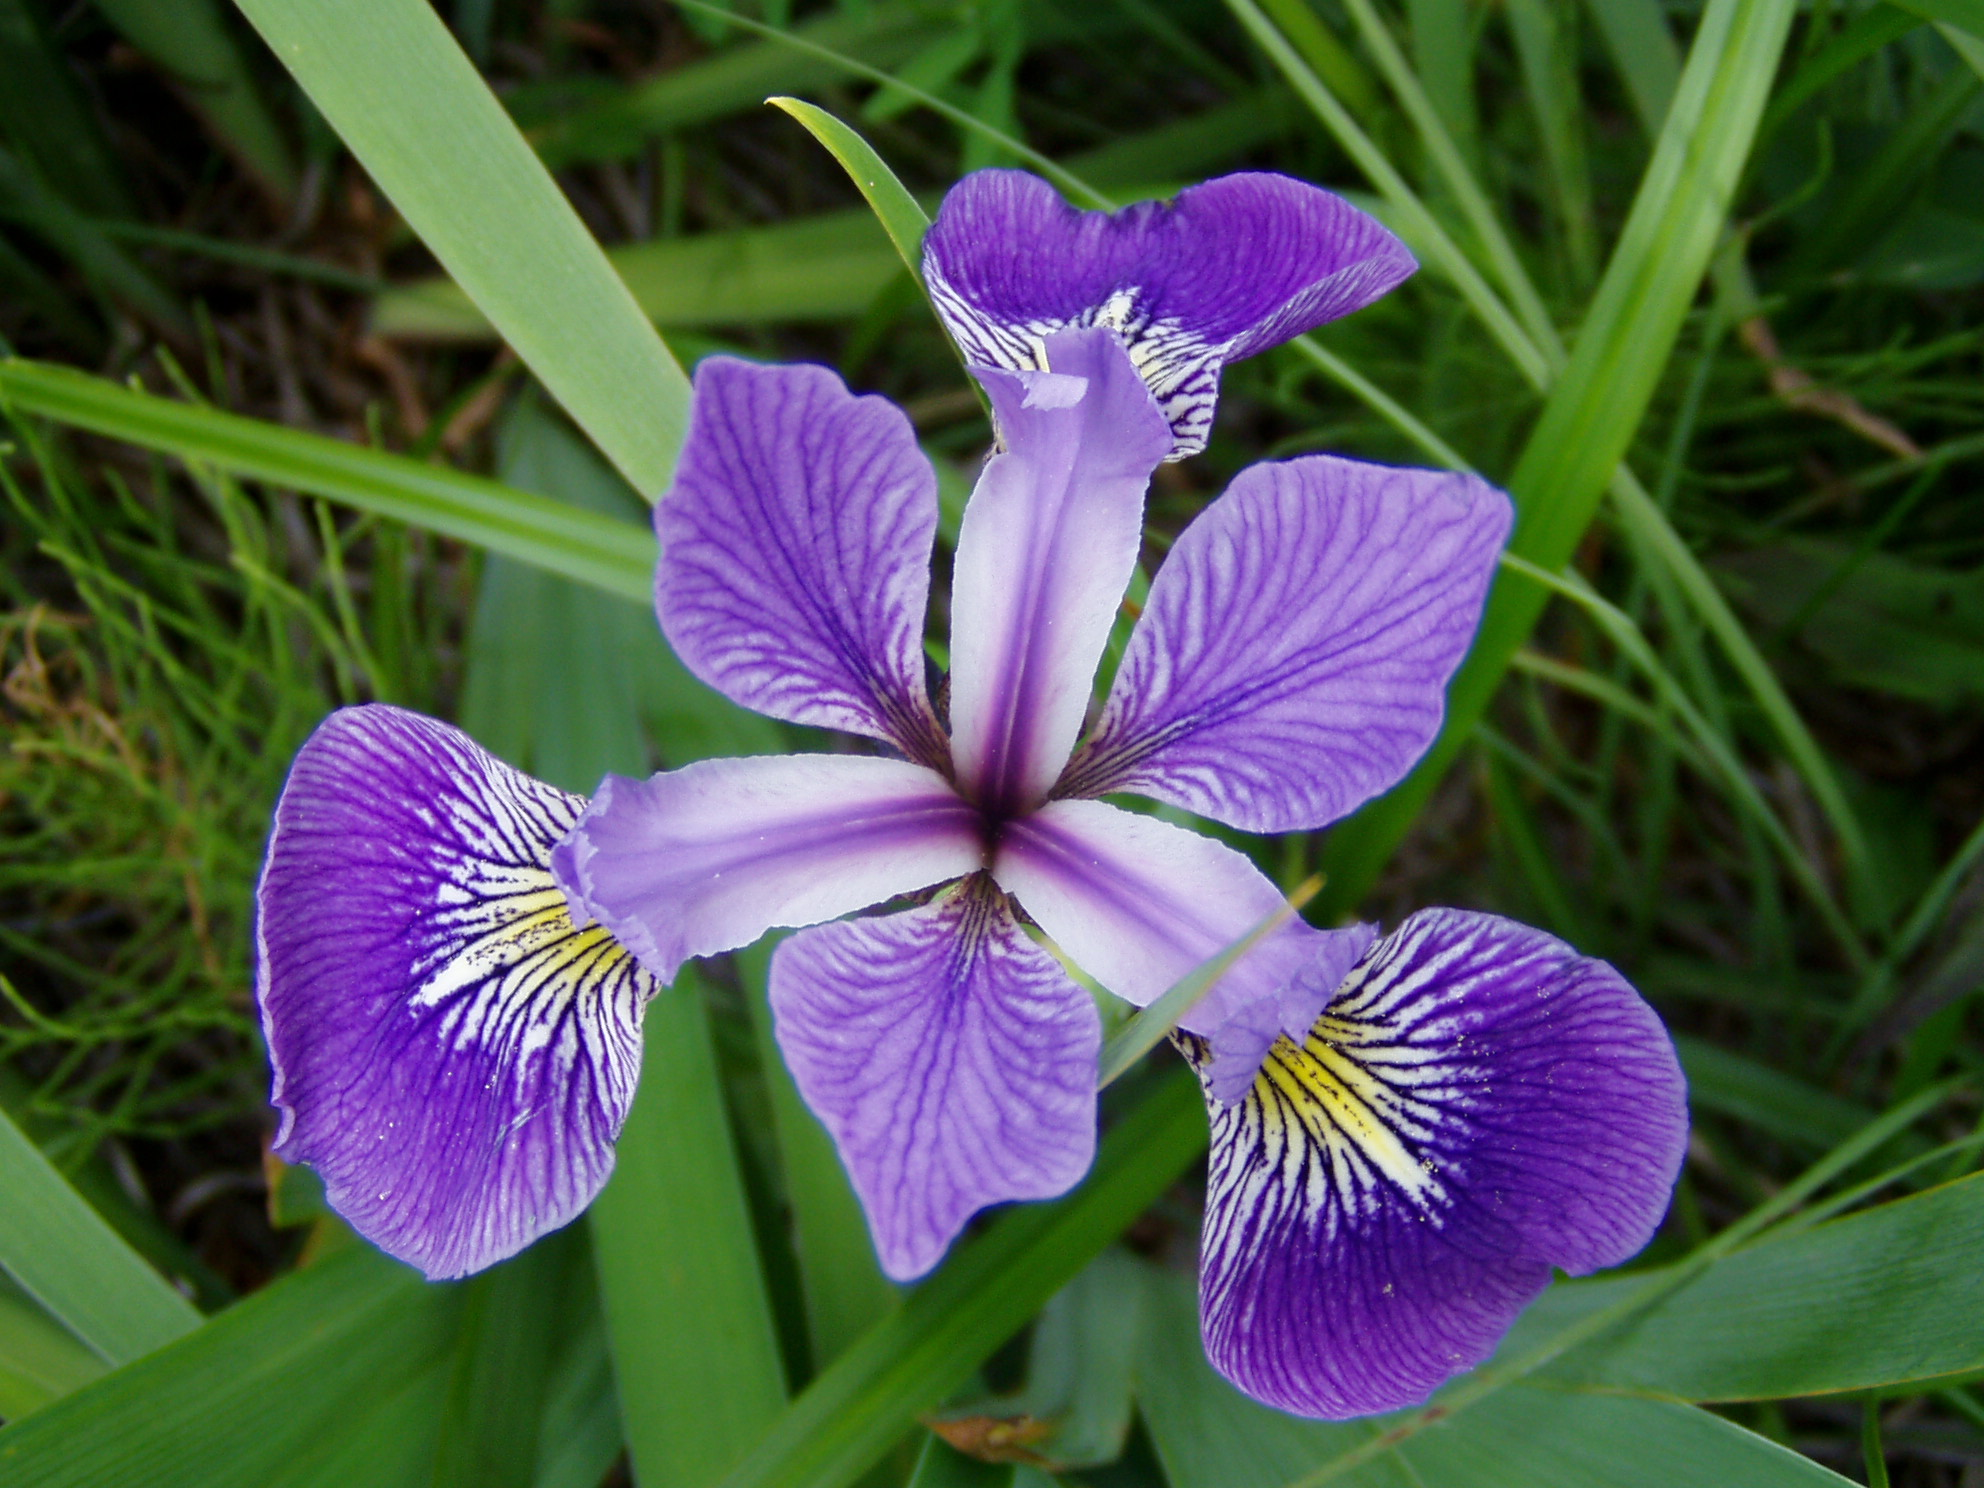

In [2]:
# The Iris Versicolor
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg'
Image(url,width=300, height=300)

In [3]:
# The Iris Virginica
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
Image(url,width=300, height=300)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data

**Using seaborn to get the iris data **

In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')

## Exploratory Data Analysis

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

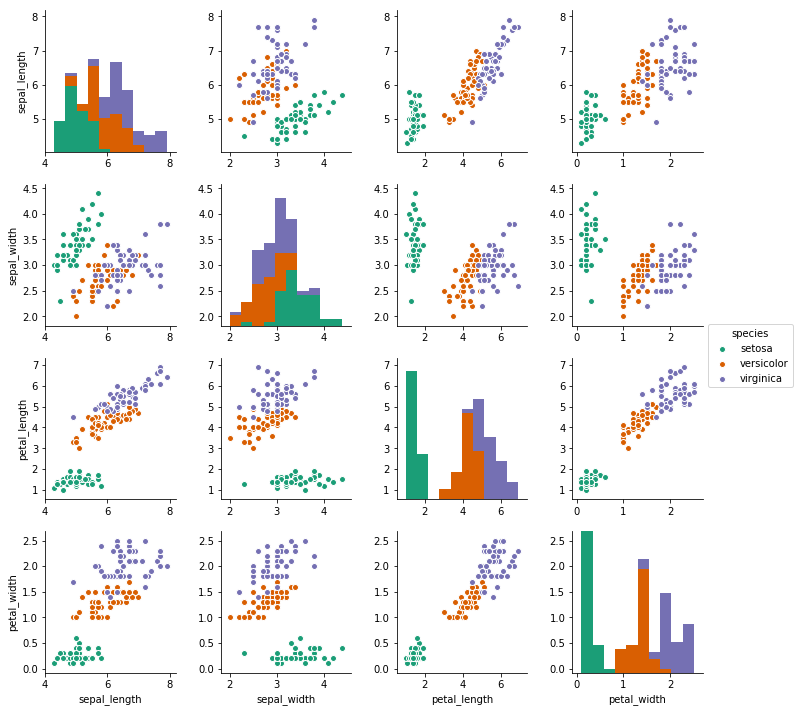

In [7]:
sns.pairplot(iris,hue='species',palette='Dark2')

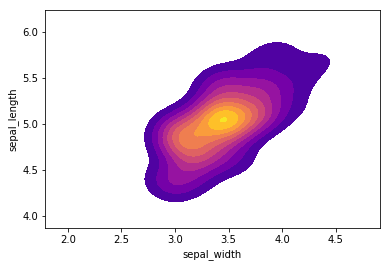

In [8]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],cmap="plasma", shade=True, shade_lowest=False)

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train a Mode

In [10]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Model Evaluation

In [11]:
predictions = svc_model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 16  1]
 [ 0  1 14]]


In [13]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.94      0.94      0.94        17
  virginica       0.93      0.93      0.93        15

avg / total       0.96      0.96      0.96        45



## Gridsearch Practice

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [15]:
grid_predictions = grid.predict(X_test)

In [16]:
print(confusion_matrix(y_test,grid_predictions))

[[13  0  0]
 [ 0 16  1]
 [ 0  1 14]]


In [17]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.94      0.94      0.94        17
  virginica       0.93      0.93      0.93        15

avg / total       0.96      0.96      0.96        45

